## **DATA ANALYSIS PROJECT**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **IMPORT RAW DATA**

In [2]:
df=pd.read_csv("C:/Users/LENOVO/Desktop/blinkit_data.csv")

In [3]:
df.shape

(8523, 12)

## **SAMPLE DATA**

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## **SIZE OF DATA**

In [5]:
print("size of data:",df.shape)

size of data: (8523, 12)


## **FIELD INFORMATION**

In [6]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [7]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## **DATA CLEANING**

In [8]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [9]:
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'LF': 'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
})


In [10]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat']


## **BUSINESS REQUIREMENTS**

## **KPI's REQUIREMENTS**

In [11]:
#TOTAL SALES
total_sales=df['Sales'].sum()

#AVERAGE SALES
avg_sales=df['Sales'].mean()

#NUMBER OF ITEMS SOLD
no_of_items_sold=df['Sales'].count()

#AVEREAGE RATING
avg_rating=df['Rating'].mean()

# DISPLAY
print(f"Total sales: ₹{total_sales:,.3f}")
print(f"Average sales: ₹{avg_sales:,.3f}")
print(f"Number of items sold: {no_of_items_sold:,}")
print(f"Average rating: {avg_rating:.1f}")



Total sales: ₹1,201,681.481
Average sales: ₹140.993
Number of items sold: 8,523
Average rating: 4.0


## **CHART REQUIREMENTS**

## **TOTAL SALES BY FAT CONTENT**

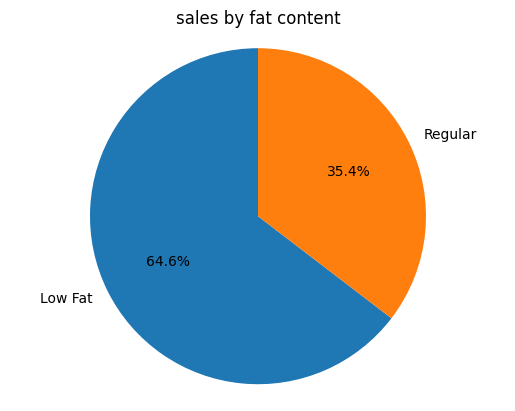

In [24]:
sales_by_fat = df.groupby("Item Fat Content")["Sales"].sum()

plt.pie(sales_by_fat,labels=sales_by_fat.index,
        autopct='%1.1f%%',
        startangle =90)
plt.title('sales by fat content')
plt.axis('equal')
plt.show()

## **TOTAL SALES BY ITEM TYPE**

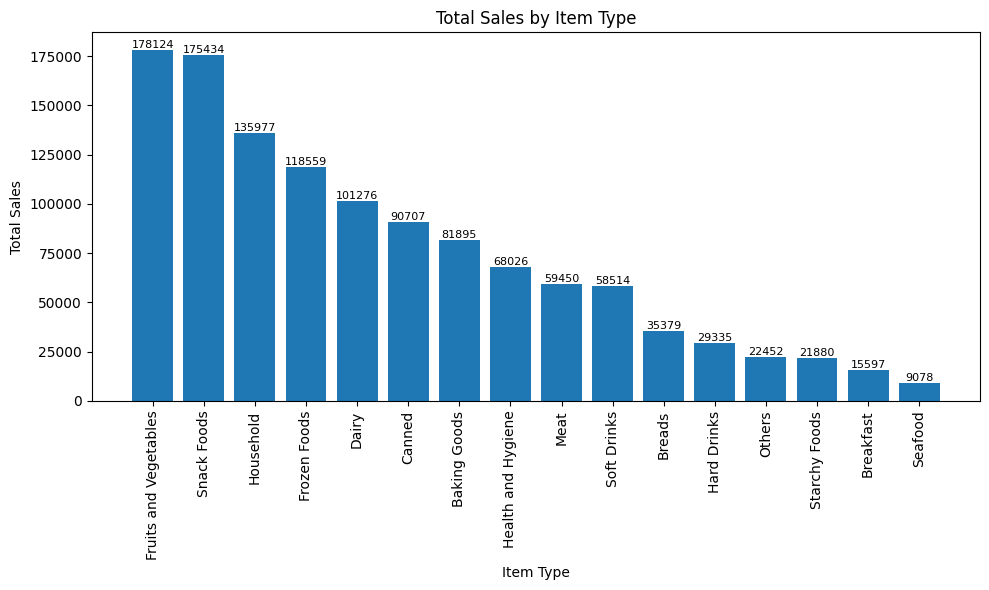

In [25]:
 # Total Sales by Item Type

sales_by_type = (
    df.groupby("Item Type")["Sales"]
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(10, 6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel("Item Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Item Type")

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():.0f}",
        ha="center",
        va="bottom",
        fontsize=8
    )

plt.tight_layout()
plt.show()


## ** Total Sales by Outlet Establishment Year**


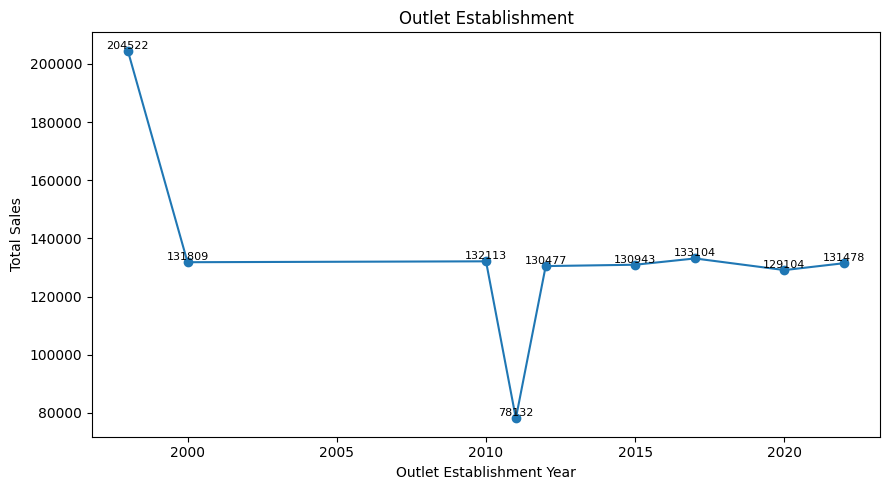

In [28]:


sales_by_year = (
    df.groupby("Outlet Establishment Year")["Sales"]
      .sum()
      .sort_index()
)

plt.figure(figsize=(9, 5))
plt.plot(
    sales_by_year.index,
    sales_by_year.values,
    marker='o',
    linestyle='-'
)

plt.xlabel("Outlet Establishment Year")
plt.ylabel("Total Sales")
plt.title("Outlet Establishment")

# FIXED LOOP
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f"{y:.0f}", ha="center", va="bottom", fontsize=8)

plt.tight_layout()
plt.show()
